<br />
<br />
*******************************************************
# Introduction to Machine Learning with Scikit-Learn
*******************************************************


<br />
<br />
Melanie Bieli, June 2018

#### Import required modules

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
#!conda install scikit-learn

## Setting the Stage: The Machine Learning Landscape

<br />
<img src="machine_learning_xkcd.png" width="350">

Image source: www.xkcd.com
<br /> 

### What is Machine Learning?

-  Branch of AI  based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention
-  Focus on predictions
-  Data driven
-  Concern about overfitting but not model complexity per se

<br />
<img src="ml_overview.png" width="800">

Image source: www.wordstream.com
<br /> 

# 1) A simple classification example: What fruit is this?

This example is based on the University of Michigan's "Applied Machine Learning in Python" course.

<img src="fruits.jpg" width="250">

Image source: www.freepik.com

In [3]:
# Load data and have a look at them
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

**!!! Note: !!!** 

Our fruit dataset is an unrealistically clean dataset. Usually, datasets are a lot messier - **cleaning and preprocessing often take up a good chunk of the total model development time!**

Frequently used preprocessing steps include feature scaling, encoding categorical features, dealing with missing values ("imputation"), adding polynomial features, etc. You can find a list of scikit-learn's preprocessing tools here:
http://scikit-learn.org/stable/modules/preprocessing.html

In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, width and color score of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

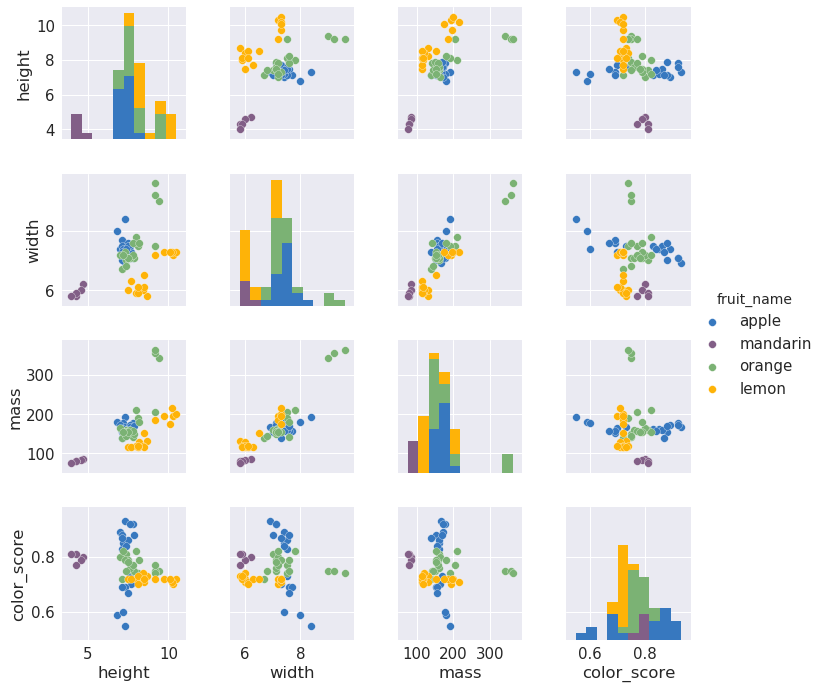

In [5]:
sn.set(font_scale=1.5) # bigger font
from matplotlib.colors import ListedColormap

# Define colors
fcolors = sn.xkcd_palette(['windows blue', 'dusty purple', 'faded green', 'amber']) # seaborn palette
fcolors_cmap = ListedColormap(fcolors.as_hex()) # for use as a matplotlib cmap later on
fdict = {'apple': fcolors[0], 'mandarin': fcolors[1], 'orange': fcolors[2], 'lemon': fcolors[3]}

# Plot a scatter matrix of features
features_to_plot = fruits[['height', 'width', 'mass', 'color_score']]
sn.pairplot(fruits, hue='fruit_name', palette=fcolors, vars=features_to_plot, 
            plot_kws=dict(s=60), size=2.5)

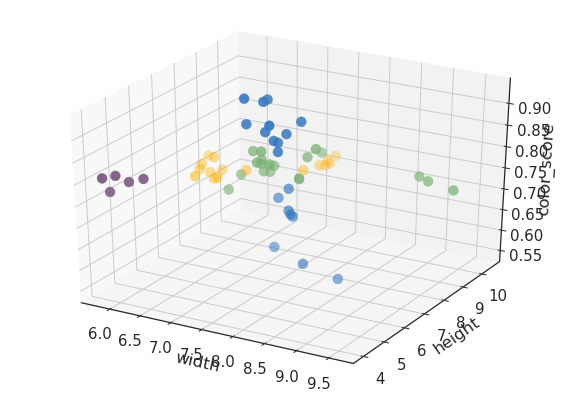

In [6]:
# Plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
sn.set_style(style='white')
cmap = cm.get_cmap('gnuplot')

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(fruits['width'], fruits['height'], fruits['color_score'], 
           c=fruits['fruit_label'], marker='o', s=100, cmap=fcolors_cmap)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [7]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']] # these are the features we will use (=predictors)
y = fruits['fruit_label'] # this is what we are trying to predict (=predictand)

# default is a 75%/25% train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

Now we get to choose a classification method - scikit-learn offers a wide range of supervised learning algorithms, see http://scikit-learn.org/stable/supervised_learning.html

These algorithms are implemented in scikit-learn as separate classes or ''Estimator'' objects. Let's try to classify fruits using a k-nearest neighbors (kNN) model, which is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the new sample to their predominant class. 

A k-nearest neighbors classification model is constructed like this:

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [10]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [11]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [12]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

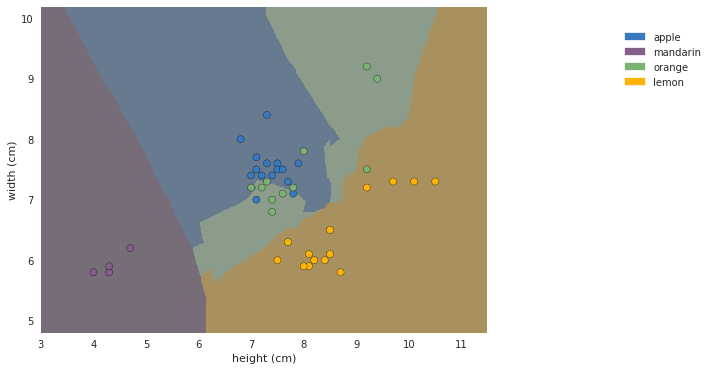

In [16]:
def plot_fruit_knn(X, y, n_neighbors, weights):

    import matplotlib.patches as mpatches 
    
    fcolors_bold = sn.xkcd_palette(['windows blue', 'dusty purple', 'faded green', 'amber']) # seaborn palette
    cmap_bold = ListedColormap(fcolors_bold)
    fcolors_light = sn.color_palette(palette=fcolors_bold, desat=0.3)
    cmap_light = ListedColormap(fcolors_light)
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    #cmap_bold = fcolors_cmap
    #cols_rgb = [hex_to_rgb(hex_col) for hex_col in fcolors_cmap.colors]
    #cmap_light = ListedColormap([a[:-1] + (a[-1]/2,) for a in cols_rgb])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color=fcolors_cmap(0), label='apple')
    patch1 = mpatches.Patch(color=fcolors_cmap(1), label='mandarin')
    patch2 = mpatches.Patch(color=fcolors_cmap(2), label='orange')
    patch3 = mpatches.Patch(color=fcolors_cmap(3), label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3], bbox_to_anchor=(1.5, 0.95))

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()


plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

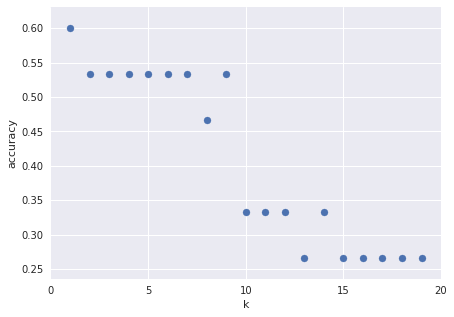

In [17]:
sn.set()

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(7,5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

#### How well can a Support Vector Machine Classifier distinguish between different types of fruits?

In [18]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1, random_state=0)
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))


# In the fruit dataset there are four categories of fruit. So scikit-learn learns 
# four different binary classifiers. To predict a new data instance, what it then 
# does is, it takes that data instance whose label is to be predicted 
# and runs it against each of the binary classifiers in turn, and the classifier that 
# has the highest score is the one whose class it uses as the prediction value.

# In this case the first pair of coefficients corresponds to a classifier that 
# classifies apples versus the rest of the fruit, and so, these pair of coefficients 
# and this intercept define a straight line
# print svc.coef_
# print svc.intercept_

0.6


# 2) Another (classification) problem: How to find love?

This example is based on Vince Favilla's Capstone Project (https://github.com/vincefav/speed-dating).

<img src="speed_dating.jpg" width="400">

Image source: www.heartcenteredevents.com


In [ ]:
data = pd.read_csv('speed_dating.csv', encoding='latin-1')

print(data.shape)
print(data.columns)

#### Problem statement

This dataset is the result of several speed dating events conducted by two professors from Columbia University (Fisman et al., 2006. Gender differences in mate selection: Evidence from a speed dating experiment).

Each row contains a record of one speed dating encounter: the participant's ID, their partner's ID, and information about the participant. 
<br />
The **features** include:

-   socioeconomic status/income
-   self-rated personality traits such as ambitiousness, fun-ness and sicnerity
-   self-rated attractiveness and importance of attractiveness in a partner
-   planned career paths (participants are students)
-   etc.

The question we're trying to answer is:
<br />
**Given these features, can we predict whether two participants will be interested in one another romantically?**

We have a binary target variable (=predictand): 

-  **1** if both individuals would like to meet again
-  **0** if one or both decline



In [ ]:
# What percentage of pairs resulted in a match?
data['match'].value_counts(normalize=True)

In [ ]:
# There were several rounds ("waves") of experiments, not all of which used the 
# same scoring system. We remove the samples that are based on scores from 1 to 10
data = data[~data['wave'].isin(range(6,12))]

### Clean-up

In [ ]:
# Income is given as e.g. 67,890.00 --> change this to 67890.
data['income'] = pd.to_numeric(data['income'].str.replace(',', ''))

In [ ]:
# Remove all columns of type 'object' (mostly strings) - we won't 
# use those 
data = data.select_dtypes(exclude=['object'])

### Dealing with missing values

In [ ]:
# How many missing values do we have?
data.isnull().sum().sort_values(ascending=False)[:10]

In [ ]:
# A crude approach to deal wih missing values would be to just drop all rows that 
# contain at least one missing value. If we want that, we can just do
# data.dropna()

# Or, we could keep only the rows with a certain minimum number of 
# valid entries:
# data.dropna(thresh=100)

# We will drop all rows with invalid entries of 'match' (our predictand) and 'iid'.
data = data.dropna(subset=['iid', 'match'])

# But since we want to keep as many samples as possible, we are going to replace 
# all other missing values with the median
data = data.fillna(data.median())

# More sophisticated approaches would fill the missing values with values 
# estimated by another predictive model - there's in example in the cell below.

# In general: Which strategy "makes most sense" really depends on the dataset!

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import r2_score

# # Get null columns
# null_cols = data.isnull().sum()
# null_cols = list(null_cols[null_cols != 0].index)

# for i in null_cols:
#     x = data.fillna(data.mean()).drop(['match', 'id'], axis=1)
#     y = x.pop(i)
    
#     xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
#     knn = KNeighborsRegressor()
#     knn.fit(xtrain, ytrain)      
#     pred = knn.predict(xtest)
#     r2 = r2_score(ytest, pred)
    
#     # If we can reasonably predict these values, do so
#     if r2 > 0.2:
#         data['predicted'] = knn.predict(data.fillna(data.median()).drop([i, 'match', 'id'], axis=1))
#         data[i] = np.where(data[i].isnull(), data['predicted'], data[i])
#         del data['predicted']
    
#     # Otherwise, just take the median
#     else:
#         data[i] = data[i].fillna(data[i].median())

### Adding more features 

We can construct additional features that may have some predictive skill:

For example, we can use the average rating of each participant (as determined by how often his or her partners wanted to see them again) as a measure of each person's desirability. 

Or, we can we can determine how "choosy" someone is -- were they interested in every person they met, or hardly anyone?

In [ ]:
desirability = data.groupby('iid').mean()['dec_o'].to_dict()
data['desirability'] = data['iid'].map(desirability)

choosiness = data.groupby('iid').mean()['dec'].to_dict()
data['choosiness'] = data['iid'].map(choosiness)

We might also guess that not just absolute values of attributes matter, but also (or even more so) their differences in the two participants meeting each other.

In [ ]:
def get_partner_data(pid, col):
    """
    Looks up the person's partner.
    """
    partner = data[data['iid'] == pid].head(1)[col].iloc[0]
    return partner

# Income (take the log difference)
data['partner_income'] = data['pid'].apply(get_partner_data, col='income')
data['income_difference'] = np.log1p(np.abs(data.income - data.partner_income))

# Age
data['age_difference'] = data['age'] - data['age_o']

In [ ]:
# Compare the each person's overall desirability to their partner's.
data['partner_desirability'] = data['pid'].apply(get_partner_data, col='desirability')
data['des_diff'] = data['desirability'] - data['partner_desirability']

# Also for Choosiness
data['partner_choosiness'] = data['pid'].apply(get_partner_data, col='choosiness')
data['choose_diff'] = data['choosiness'] - data['partner_choosiness']

In [ ]:
# For the purpose of this tutorial, we will only use a
# subset of the 195 features in order to minimize the 
# preprocessing work

data = data[['order', 'int_corr', 'samerace', 'choosiness', 'choose_diff', 'age',
             'income_difference', 'desirability', 'partner_desirability', 
             'age_difference', 'intel', 'go_out', 'match']]


### Create train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('match', axis=1)
y = data['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object and train the classifier (fit the estimator) using the training data
#### A) Simple logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
                            class_weight=None, random_state=0, solver='liblinear')

logreg.fit(X_train, y_train)

#### B) More fancy approach using logistic regression with cross validation and a pipeline

In [ ]:
from sklearn.linear_model import LogisticRegressionCV # includes cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

C_values = [0.05, 0.1, 0.5, 1., 5.]
n_folds = 10
logregCV = LogisticRegressionCV(Cs=C_values, fit_intercept=True, 
                                cv=n_folds, dual=False, penalty='l2', 
                                scoring='roc_auc', solver='liblinear', 
                                tol=0.0001, max_iter=1000, class_weight=None, 
                                random_state=0)

logregCV_pipe = make_pipeline(StandardScaler(), logregCV)
logregCV_pipe.fit(X_train, y_train)
print(logregCV_pipe.get_params().keys())

In [ ]:
coef_B = logregCV_pipe.named_steps['logisticregressioncv'].coef_

plt.figure(figsize=(10,8))
coef_logregCV_pipe = pd.Series(coef_B.ravel(),
                               index=X_train.columns)    
coef_logregCV_pipe.sort_values().plot(kind="barh")

### Evaluate the performance of the model on the test data

There are lots of different metrics available to evaluate the performance of your model: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [ ]:
from sklearn.metrics import roc_curve, classification_report, \
                            confusion_matrix, brier_score_loss

In [ ]:
y_pred_A = logreg.predict(X_test) # the predicted classes ("1" for match, "0" for no match)
y_prob_A = logreg.predict_proba(X_test)[:,1] # the predicted probabilities of class 1

# Calculate performance metrics
n_TN, n_FP, n_FN, n_TP = confusion_matrix(y_test, y_pred_A).ravel()

# Matthews correlation coefficient
MCC = (n_TP * n_TN - n_FP * n_FN) / np.sqrt((n_TP + n_FP) * (n_TP + n_FN) * (n_TN + n_FP) * (n_TN + n_FN))
if np.isnan(MCC):                                  
    MCC = 0
    
# Brier score loss (the smaller, the better)
BSL = brier_score_loss(y_test, y_prob_A)
    
# Accuracy
accuracy = float((n_TP + n_TN)) / (n_TP + n_FP + n_TN + n_FN)

n_test = float(len(y_pred_A))
print("TP: {0} ({1:2.1f}%)".format(n_TP, n_TP / n_test * 100.))
print("TN: {0} ({1:2.1f}%)".format(n_TN, n_TN / n_test * 100.))
print("FP: {0} ({1:2.1f}%)".format(n_FP, n_FP / n_test * 100.))
print("FN: {0} ({1:2.1f}%)".format(n_FN, n_FN / n_test * 100.))
print("\nAccuracy: {0:2.2f}".format(accuracy))
print("Matthews correlation coefficient: {0:2.2f}".format(MCC))
print("Brier score loss: {0:2.4f}".format(BSL))


In [ ]:
y_pred_B = logregCV_pipe.predict(X_test)
y_prob_B = logregCV_pipe.predict_proba(X_test)[:,1]

# Calculate performance metrics
n_TN, n_FP, n_FN, n_TP = confusion_matrix(y_test, y_pred_B).ravel()

# Matthews correlation coefficient
MCC = (n_TP * n_TN - n_FP * n_FN) / np.sqrt((n_TP + n_FP) * (n_TP + n_FN) * (n_TN + n_FP) * (n_TN + n_FN))
if np.isnan(MCC):                                  
    MCC = 0
    
BSL = brier_score_loss(y_test, y_prob_B)

n_test = float(len(y_pred_B))
print("TP: {0} ({1:2.1f}%)".format(n_TP, n_TP / n_test * 100.))
print("TN: {0} ({1:2.1f}%)".format(n_TN, n_TN / n_test * 100.))
print("FP: {0} ({1:2.1f}%)".format(n_FP, n_FP / n_test * 100.))
print("FN: {0} ({1:2.1f}%)".format(n_FN, n_FN / n_test * 100.))
print("\nAccuracy: {0:2.2f}".format(accuracy))
print("Matthews correlation coefficient: {0:2.2f}".format(MCC))
print("Brier score loss: {0:2.4f}".format(BSL))

** In this example, using cross-validation to optimize the regularization strength only slightly increases the performance. However, applying cross-validation, scaling features, choosing different "penalties" in the regularization ('l1' vs. 'l2') etc. can greatly improve your model! **

# 3) From Love to Wine: A Regression Example

Our goal is to predict wine quality.

<br />
<img src="wine_quality.jpg" width="400">

Wine quality control in Adega Cooperativa de Borba winery, Alentejo, Portugal. Image by Manuel Ribeiro.
<br /> 

#### Load dataset

In [ ]:
dataset_url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(dataset_url, sep=';')
 
print(data.head())

### Create train-test split

In [ ]:
y = data['quality'] 
X = data.drop('quality', axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object and train the classifier (fit the estimator) using the training data

#### A) Linear regression

In [ ]:
# Sometimes (e.g. when feature values have very different ranges) it can be
# useful to scale or normalize the training and test sets before using them
# in a model, so let's do that here:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**!! A note about data leakage !!**

The proper way to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data. Instead, 
you should fit the scaler only to the training data, transform the training data, and then transform the test data with that same scaler.

**"Contaminated" training data can lead to over-optimistic performance estimations on your testing data!**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, r2_score

linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)

In [ ]:
fig = plt.figure(figsize=(10,8))
coef_linreg = pd.Series(linreg.coef_.ravel(),
                        index=X_train.columns)    
coef_linreg.sort_values().plot(kind="barh")

#### Evaluate the Linear regression model

In [ ]:
y_pred = linreg.predict(X_test)
expl_var = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("*********")
print("Performance of linear regression:")
print("*********")
print("\texplained variance: {0:2.3f}".format(expl_var))
print("\tR2 score: {0:2.3f}".format(r2))

#### B) Random Forest regression

Random forest is an ensemble tool which takes a subset of observations and a subset of variables to build decision trees. It builds multiple such decision trees and combines them to get a more accurate and stable prediction.

The model has a couple of levers, i.e., parameters we can tune to improve performance. Such parameters that define the "higher-level" structure of a model are called **hyperparameters**. 

E.g., in Random Forest regression, hyperparameters include the number of individual decision trees, the maximum number of features used in each of these trees, or their maximum depth. We can explore the hyperparameter space using a **grid search**, where we try different combinations of hyperparameters and then use the best combination for our final model.

<img src="random_forest.jpg" width="600">

Image source: www.dataaspirant.com

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Declare data preprocessing steps
pipeline = make_pipeline(StandardScaler(), 
                         RandomForestRegressor())
 
# Define hyperparameters to tune
hyperparameters = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth': [None, 5, 3, 1],
                   'randomforestregressor__n_estimators': [50, 100]}
 
# Tune model using cross-validation pipeline
forest_cv = GridSearchCV(pipeline, hyperparameters, cv=10)
forest_cv.fit(X_train, y_train)

#### Evaluate the Random Forest model

In [ ]:
y_pred = forest_cv.predict(X_test)
expl_var = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("*********")
print("Performance of Random Forest regression:")
print("*********")
print("\texplained variance: {0:2.3f}".format(expl_var))
print("\tR2 score: {0:2.3f}".format(r2))